# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import glob
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

İn this code , We're going to classifier between to animal images.We have different two animals that those're dog and cat.Now We're loading  Data which have images of dog and cat then We're going to  resize to image  as 64x64 .

In [ ]:
Dog_data = []
dim=(64,64)
files = glob.glob ("C:/Users/mmuca/Documents/Deep_Learning/Practice/animals10/raw-img/cane/*.jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    Dog_data.append (cv2.resize(image,dim , interpolation=cv2.INTER_AREA));


Dog_data includes image of dog.

In [ ]:
Cat_data = []
files = glob.glob ("C:/Users/mmuca\Documents/Deep_Learning/Practice/animals10/raw-img/gatto/*.jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    Cat_data.append (cv2.resize(image,dim , interpolation=cv2.INTER_AREA));


Cat Data includes image of cat. Let me show you  two images , we view What Arrays have images .

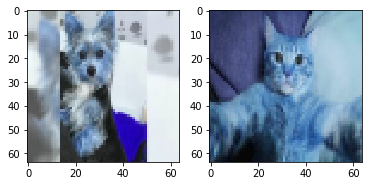

In [4]:
plt.subplot(1,2,1)
plt.imshow(Dog_data[0])
plt.subplot(1,2,2)
plt.imshow(Cat_data[0])

In [5]:
X = np.concatenate((Dog_data[0:500], Cat_data[0:500] ), axis=0) #Combined to Arrays of dog and Arrays of cat 
z = np.zeros(500) # z holds  1 values     
o = np.ones(500) # o holds  0 values 
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1) # Combined to two arrays again.
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (1000, 64, 64, 3)
Y shape:  (1000, 1)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42) # Splittet Data up into 4 different variables on given rate.
number_of_train = X_train.shape[0] 
number_of_test = X_test.shape[0]
print("Number of Train : " , number_of_train)
print("Number of Test : " , number_of_test)

Number of Train :  850
Number of Test :  150


# Flattening

In [7]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2]*3)
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (850, 12288)
X test flatten (150, 12288)


In [8]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (12288, 850)
x test:  (12288, 150)
y train:  (1, 850)
y test:  (1, 150)


# Normalization

###### Transaction of Sigmoid  invoke 1   for big number , even transaction involve log expression , that's why Big values's invoked as "NaN" by Function named Sigmoid , For We know what İt meant ,that's why Normalization is usefull for this data.

In [9]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [21]:
def initialize_weights_and_bias(dimension): # Assigned initialize value for weight and bias
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [22]:
def sigmoid(z): #Sigmoid function does that reduce All value into between  1 and 0.
    y_head=1/(1+np.exp(-z))
   
    return y_head

In [23]:
def forward_backward_propagation(w,b,x_train,y_train): 
    z=np.dot(w.T, x_train)+b 
    y_head=sigmoid(z)   
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    #backward
    derivate_weight=(np.dot(x_train ,((y_head-y_train).T)))/x_train.shape[1]
    derivate_bias =np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivate_weight":derivate_weight , "derivate_bias":derivate_bias}
    return cost,gradients

In [24]:
def update(w, b, x_train , y_train , learning_rate , number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    for i in range(number_of_iteration):
    
        cost ,gradients =forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        
        w=w - learning_rate*gradients["derivate_weight"]
        b=b - learning_rate*gradients["derivate_bias"]
        
        if i % 10 == 0 :
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f"%(i, cost))
            
    parameters={"weight": w , "bias":b}
    
    plt.plot(index,cost_list2)
    plt.xticks(index , rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("cost")
    plt.show()
    return parameters , gradients , cost_list  

In [25]:
#prediction
def predict(w ,b ,x_test):
    #x_test is a a input for forward propagation
    
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    #if z is bigger than 0.5 , our prediction is sign one(y_head=1),
    #if z is smaller than 0.5 our prediction is sign zero(y_head=0),
    for i in range(z.shape[1]):
        if z[0,i] <=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction

Cost after iteration 0: 1.850289
Cost after iteration 10: 1.847718
Cost after iteration 20: 1.845148
Cost after iteration 30: 1.842579
Cost after iteration 40: 1.840013
Cost after iteration 50: 1.837447
Cost after iteration 60: 1.834883
Cost after iteration 70: 1.832321
Cost after iteration 80: 1.829760
Cost after iteration 90: 1.827201
Cost after iteration 100: 1.824643
Cost after iteration 110: 1.822086
Cost after iteration 120: 1.819532
Cost after iteration 130: 1.816978
Cost after iteration 140: 1.814427


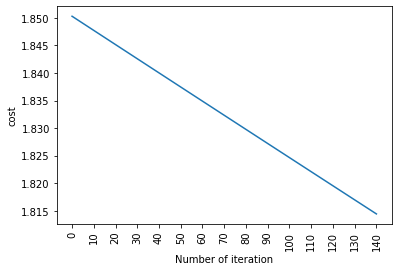

train acccuracy: 49.411764705882355 %
test accuracy : 53.333333333333336 %


In [26]:
def logistic_regression(x_train , y_train , x_test , y_test , learning_rate , num_iterations):
    #initialize
    dimension=x_train.shape[0] 
    w,b = initialize_weights_and_bias(dimension)
    
    #do not change learning rate
    parameters , gradients , cost_list = update(w, b , x_train , y_train ,learning_rate ,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    
    #print train,test errors
    print("train acccuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy : {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
          
logistic_regression(x_train , y_train , x_test , y_test ,learning_rate=0.0001 , num_iterations=150)

In [27]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(random_state=42 , max_iter=150)
print("test accuracy : {}".format(logreg.fit(x_train.T , y_train.T).score(x_test.T , y_test.T)))
print("train accuracy: {}".format(logreg.fit(x_train.T,y_train.T).score(x_train.T,y_train.T)))

C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy : 0.6533333333333333


C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.7823529411764706
